## Ordinal Classification
### Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from feature_engine.outliers import OutlierTrimmer
from feature_engine.selection import DropCorrelatedFeatures

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.pipeline import Pipeline as IMBPipeline

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Data Loading

In [3]:
# Data Import
df = pd.read_csv('../../../data/winequality-white.csv',sep=';')
df.sample(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1282,7.4,0.310,0.74,10.7,0.039,51.0,147.0,0.99770,3.02,0.43,8.7,5
2442,7.6,0.285,0.32,14.6,0.063,32.0,201.0,0.99800,3.00,0.45,9.2,5
2630,5.9,0.445,0.26,1.4,0.027,23.0,109.0,0.99148,3.30,0.36,10.5,6
1940,8.3,0.360,0.57,15.0,0.052,35.0,256.0,1.00010,2.93,0.64,8.6,5
3311,6.0,0.190,0.29,1.1,0.047,67.0,152.0,0.99160,3.54,0.59,11.1,7
4597,6.7,0.660,0.00,13.0,0.033,32.0,75.0,0.99551,3.15,0.50,10.7,6
4488,6.7,0.480,0.49,2.9,0.030,28.0,122.0,0.98926,3.13,0.40,13.0,6
813,6.5,0.260,0.32,16.5,0.045,44.0,166.0,1.00000,3.38,0.46,9.5,6
1106,5.2,0.240,0.45,3.8,0.027,21.0,128.0,0.99200,3.55,0.49,11.2,8
2858,6.9,0.330,0.26,5.0,0.027,46.0,143.0,0.99240,3.25,0.43,11.2,7


In [4]:
df.shape

(4898, 12)

## Exploratory Data Analysis

In [5]:
# Know the datatypes
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

We observed, all features are continuous datatype

In [6]:
# Checked the Descriptive Statistics
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [7]:
df.rename({'quality': 'target'}, axis=1, inplace=True)

In [ ]:
sns.pairplot(df, hue='target', corner=True, palette='coolwarm')
plt.show()

## Data Preprocessing

In [8]:
# Check categorical values for the target variable
sorted(df.target.unique())

[3, 4, 5, 6, 7, 8, 9]

In [9]:
# convert the target variable into a categorical ordered form
target_type = pd.CategoricalDtype(categories=sorted(df.target.unique()), ordered=True)
df["target"] = df["target"].astype(target_type)
df['target'].dtype

CategoricalDtype(categories=[3, 4, 5, 6, 7, 8, 9], ordered=True)

In [10]:
# Duplicates dropping
nrows = df.shape[0]
df.drop_duplicates(inplace=True)
print(f'Now of rows dropped: {nrows - df.shape[0]}')

Now of rows dropped: 937


In [11]:
# Check Null Data
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
target                  0
dtype: int64

## Outliers Removal

<function matplotlib.pyplot.show(close=None, block=None)>

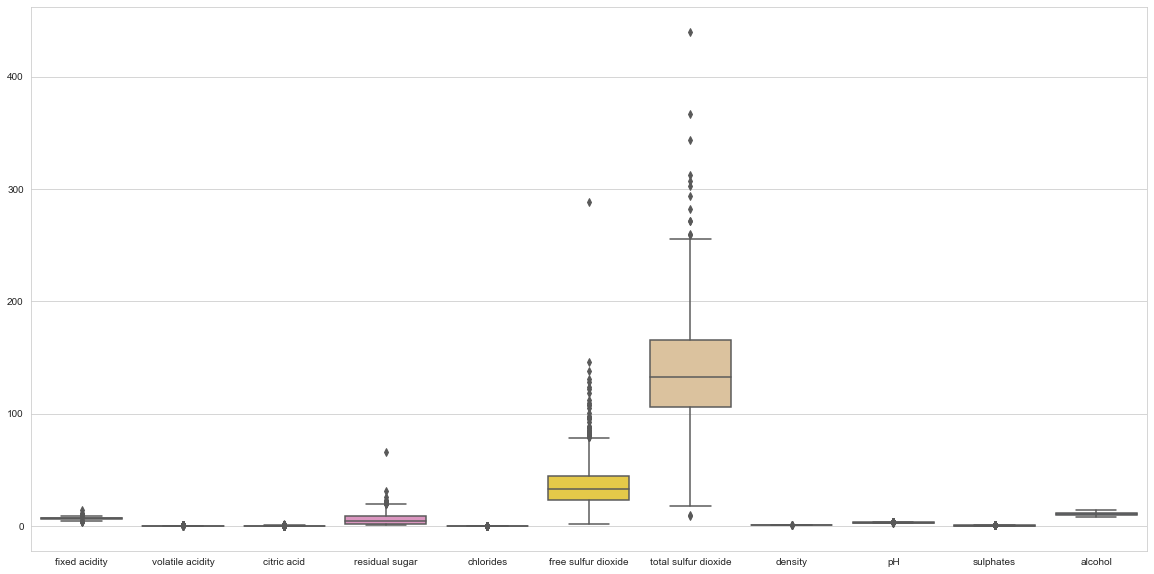

In [12]:
# Check Outliers
plt.figure(figsize=(20, 10))
sns.boxplot(data=df, orient="v", palette="Set2")
plt.show

We observed existence of outliers for features: "residual suger", "free surfur doxide", "total suffer doxide"

In [13]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'target'],
      dtype='object')

In [14]:
# Remove outliers
ot = OutlierTrimmer(capping_method='gaussian', tail='both', fold=3, variables=['residual sugar', 'free sulfur dioxide','total sulfur dioxide'])
ot.fit(df)

OutlierTrimmer(tail='both',
               variables=['residual sugar', 'free sulfur dioxide',
                          'total sulfur dioxide'])

In [15]:
print("Minimum caps :", ot.left_tail_caps_)
print("Maximum caps :", ot.right_tail_caps_)

Minimum caps : {'residual sugar': -8.668278249400306, 'free sulfur dioxide': -16.734374718970763, 'total sulfur dioxide': 7.822649692406742}
Maximum caps : {'residual sugar': 20.497917229455847, 'free sulfur dioxide': 86.51271352230324, 'total sulfur dioxide': 266.5643737865127}


In [16]:
df_out = ot.transform(df)

In [17]:
print("train data shape after removing outliers:", df_out.shape)
print(f"{df.shape[0] - df_out.shape[0]} observations are removed\n")

train data shape after removing outliers: (3922, 12)
39 observations are removed



<function matplotlib.pyplot.show(close=None, block=None)>

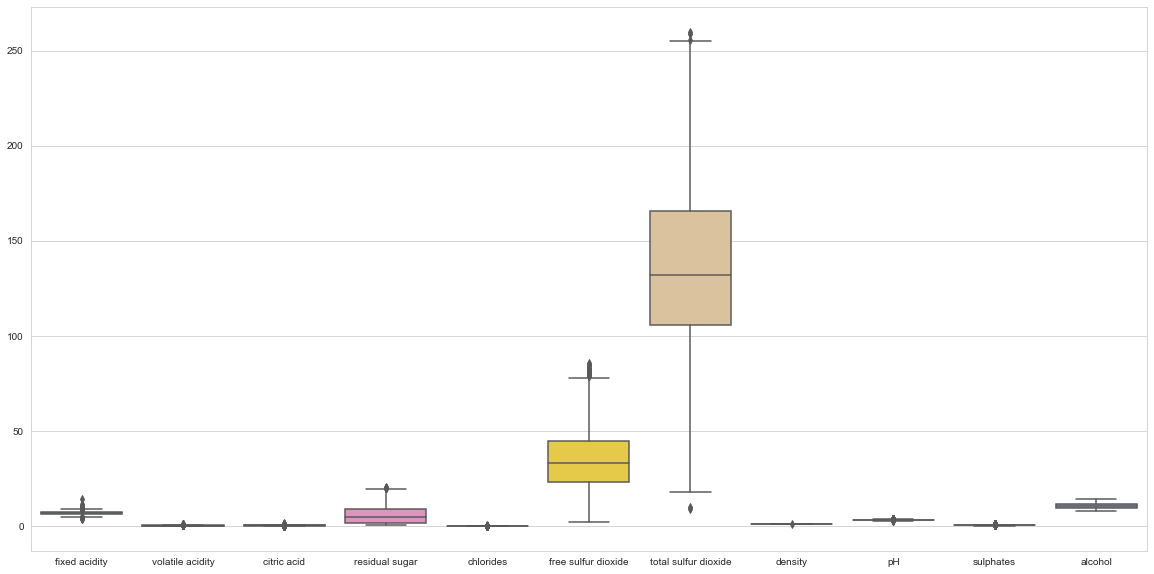

In [18]:
# Check Outliers
plt.figure(figsize=(20, 10))
sns.boxplot(data=df_out, orient="v", palette="Set2")
plt.show

## Feature Engineering

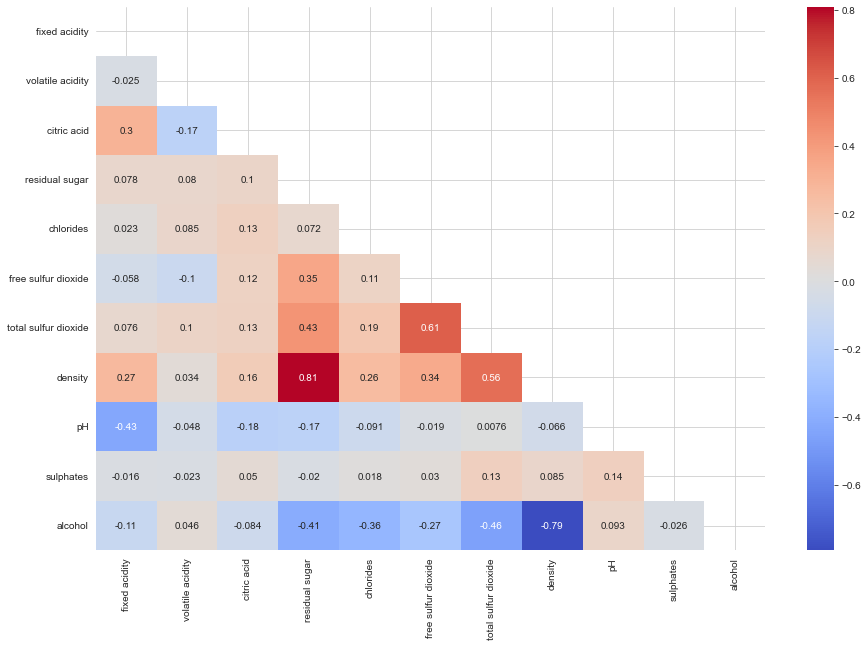

In [19]:
# Show features correlations
plt.figure(figsize=(15, 10))
sns.heatmap(data=df_out.corr(), cmap='coolwarm', mask=np.triu(df_out.corr()), annot=True)
plt.show()

We observed 'density' feature is highly correlated with 'residual suger'

In [20]:
# Drop Correlated features
cols_before = df_out.columns
tr_dcor = DropCorrelatedFeatures(variables=None, method='pearson', threshold=0.8)
df_dcor = tr_dcor.fit_transform(df_out)
cols_after = df_dcor.columns
train_not_test = cols_before.difference(cols_after)
print(f'Dropped features: {list(train_not_test)}')

Dropped features: ['density']


## Balancing the dataset

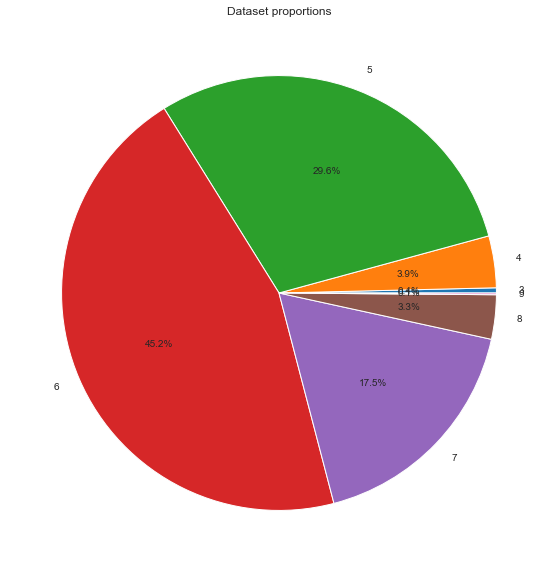

In [21]:
# Check if dataset is imbalanced
labels, counts = np.unique(df_dcor.target, return_counts=True)

plt.figure(figsize=(10, 10))
plt.pie(counts, autopct='%1.1f%%', labels=labels)
plt.title('Dataset proportions')
plt.show()

We observe that data is imbalanced, we need to balance the data

In [22]:
x = df.drop('target', axis=1)
y = df.target

In [23]:
# Sampling Pipeline
imb_pipeline = IMBPipeline([('over-sampling', SMOTE(k_neighbors=2)), ('under-sampling', EditedNearestNeighbours())])
# Transform the dataset
x_sm, y_sm = imb_pipeline.fit_resample(x,y)

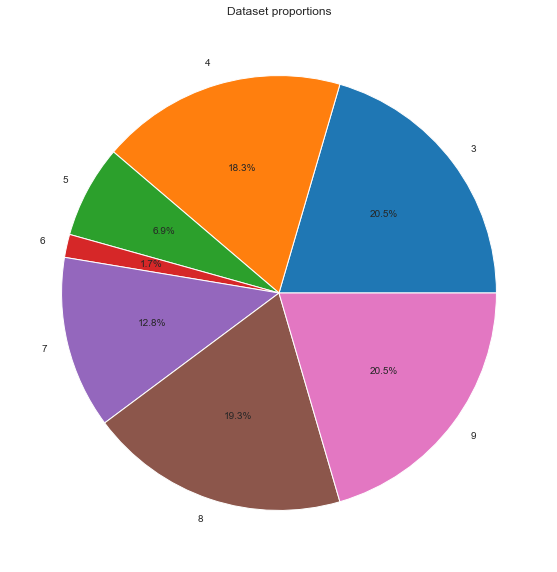

In [24]:
labels, counts = np.unique(y_sm, return_counts=True)

plt.figure(figsize=(10, 10))
plt.pie(counts, autopct='%1.1f%%', labels=labels)
plt.title('Dataset proportions')
plt.show()

## Save cleaned data

In [34]:
df_clean = pd.concat([x_sm, y_sm], axis=1)
df_clean.to_csv('../../../data/winequality-white-cleaned.csv',sep=';', index=False)